# Classification

Clustering is a type of unsupervised learning that allows us to find groups of similar objects, objects that are more related to each other than to the objects in other groups. This is often used when we don’t have access to the ground truth, in other words, the labels are missing.

Examples of business use cases include the grouping of documents, music, and movies based on their contents, or finding customer segments based on purchase behavior as a basis for recommendation engines

The goal of clustering is to separate the data into groups, or clusters, with more similar traits to each other than to the data in the other clusters.

Different Types of Clustering Algorithms There are more than 100 clustering algorithms known, 12 of them have been implemented in scikit-learn, but few gained popularity.

In general, there are four types:


​Centroid based models - each cluster is represented by a single mean vector (e.g., k-means),


​Connectivity based models - built based on distance connectivity (e.g., hierarchical clustering)


​Distribution based models - built using statistical distributions (e.g., Gaussian mixtures)

​Density based models - clusters are defined as dense areas (e.g., DBSCAN)

In this module, we will explore the simple and widely-used clustering algorithm, k-means, to reveal subgroups of wines based on the chemical analysis reports.



# K- Means

One of the most popular clustering algorithms is k-means. Assuming that there are n data points, the algorithm works as follows:

Step 1:initialization - pick k random points as cluster centers, called centroids

Step 2:cluster assignment - assign each data point to its nearest centroid based on its distance to each centroid, and that forms k clusters

Step 3:centroid updating - for each new cluster, calculate its centroid by taking the average of all the points assigned to the cluster

Step 4:repeat steps 2 and 3 until none of cluster assignments change, or it reaches the maximum number of iterations

The k-means algorithm has been implemented in module sklearn.cluster, to access it:

The algorithm has gained great popularity because it is easy to implement and scales well to large datasets. However, it is difficult to predict the number of clusters, it can get stuck in local optimums, and it can perform poorly when the clusters are of varying sizes and density.

In [1]:
from sklearn.cluster import KMeans 

Distance Metric

How do we calculate the distance in k-means algorithm? One way is the euclidean distance, a straight line between two data points as shown below.

suppose we have two points x1 and x2 the euclidean distance between points x1 = (0, 1) and x2 = (2, 0) are given by:

     sqrt((0-2)**2 + (1-0)**2)
        sqrt(2^ + 1^)
          sqrt(5)
          
Or in numpy as follows:

     x1=np.array([0, 1])
     x2=np.array([2, 0])
     print(np.sqrt(((x1-x2)**2).sum()))
        2.23606797749979
     print(np.sqrt(5))
        2.23606797749979

One can extend it to higher dimensions. In the n-dimensional space, there are two points:

    p=(p1, p2,..., pn) and q=(q1, q2,...,qn)
    
    Then the euclidean distance from p to q is given by the Pythagorean formula:
    
    d(p,q)= sqrt( (p1-q1)**2 + (p2-q2)**2 + (pn-qn)**2 )
    
There are other distance metrics, such as Manhattan distance, cosine distance, etc. The choice of the distance metric depends on the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine
data = load_wine()
wine = pd.DataFrame(data.data, columns = data.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [27]:
wine.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [4]:
wine.shape

(178, 13)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
wine.iloc[:,:3].describe()

,alcohol,malic_acid,ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


The summary statistics provide some of the information, while visualization offers a more direct view showing the distribution and the relationship between features.

Here we introduce a plotting function to display histograms along the diagonal and the scatter plots for every pair of attributes off the diagonal, 'scatter_matrix', for the ease of display, let’s show just two features:

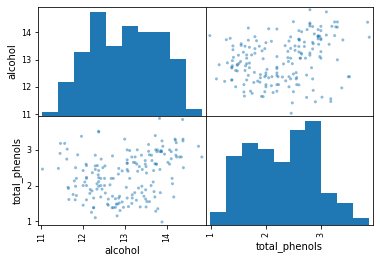

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(wine.iloc[:,[0, 5]])
plt.show()

As we don’t know the ground truth, we look into the scatter plots to come up with a reasonable candidate for k, the number of clusters. There seem to be roughly three subgroups. Remember that there are no right or wrong answers for the number of subgroups. In the real world data, rarely do we find clear clusters; but we come up with our best educated guess. For example, in the scatter plot above, there seem to be three subgroups

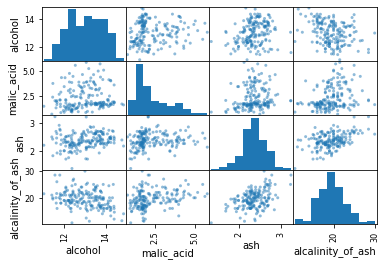

In [8]:
#Scatter plots for every pair of attributes off the diagonal for the first 4 features

scatter_matrix(wine.iloc[:, :4])
plt.show()

# Pre-processing: Standardization

After examining all the pairs of scatter plot, we pick two features to better illustrate the algorithm: alcohol and total_phenols, whose scatterplot also suggests three subclusters

In [9]:
X = wine[['alcohol', 'total_phenols']]

Unlike any supervised learning models, in general, unsupervised machine learning models do not require to split data into training and testing sets since there is no ground truth to validate the model. 

However, centroid-based algorithms require one pre-processing step because k-means works better on data where each attribute is of similar scales. One way to achieve this is to standardize the data; mathematically:

    z = (x - mean) / std

where x is the raw data, mean and std are the average and standard deviation of x, and z is the scaled x such that it is centered at 0 and it has a unit standard deviation. StandardScaler under the sklearn.preprocessing makes it easy:

In [10]:
from sklearn.preprocessing import StandardScaler

#instantianting the scaler 
scale = StandardScaler()

#computing mean and std to be used for scaling
scale.fit(X)
scale.mean_

array([13.00061798,  2.29511236])

In [11]:
scale.scale_

array([0.80954291, 0.62409056])

The raw alcohol measurements have a mean 13.00 and std 0.81 while total phenols are centered at 2.29 with a std 0.62. Next we can fit to the training data, and transform it.

In [12]:
X_scaled = scale.transform(X)

In [13]:
#A sanity check to see if each feature is centered at 0 and has a std of 1:

X_scaled.mean(axis = 0)

array([ 7.84141790e-15, -1.95536471e-16])

In [14]:
X_scaled.std(axis = 0)

array([1., 1.])

# K-means Modeling


Just like linear regression and k nearest neighbours, or any machine learning algorithms in scikit-learn, to do the modeling, we follow :

      instantiate ,
      fit ,
      predict workflow. 
      
There are other arguments in KMeans, such as method to initialize the centroids, stopping criteria, etc., yet we focus on the number of clusters, n_clusters, and allow other parameters to take the default values. Here we specify 3 clusters:

In [15]:
from sklearn.cluster import KMeans

# instantiating the model
kmeans = KMeans(n_clusters = 3)

#fitting the model
kmeans.fit(X_scaled)

#make predictions
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 2 2 0 2 0 2 1 0 1 0
 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [16]:
import collections
collections.Counter(y_pred)

#or
#np.unique(y_pred, return_counts = True)

Counter({0: 65, 2: 59, 1: 54})

There are 65 wines in cluster 0, 65 in cluster 1, and 53 in cluster 2.
   *values keep changing

To inspect the coordinates of the three centroids:

In [17]:
kmeans.cluster_centers_

array([[ 0.92017418,  0.87087204],
       [ 0.05253603, -1.14020926],
       [-1.06183503,  0.08414606]])

A better way to see the results is to visualize them:

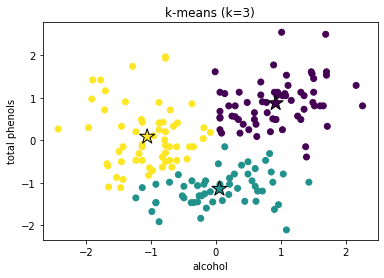

In [18]:
#plotting the scaled data
plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], 
            c = y_pred )

#identifying the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], 
            marker = '*',
            s = 250,
            c = [0, 1, 2],
            edgecolors = 'k')

plt.xlabel('alcohol')
plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.show()

The stars are the centroids. K-means divides wines into three groups: 

     low alcohol but high total phenols (upper right in purple), 
     high alcohol and high total phenols (upper left in yellow), and
     low total phenols (bottom in green). 
     
For any new wine with the chemical report on alcohol and total phenols, we now can classify it based on its distance to each of the centroids

Suppose that there is new wine with alcohol at 13 and total phenols at 2.5, let’s predict which cluster the model will assign the new wine to.

In [19]:
X_new = np.array([[13, 2.5]])
X_new_scaled = scale.transform(X_new)
print(X_new_scaled)

[[-0.00076337  0.32829793]]


In [20]:
kmeans.predict(X_new_scaled)

array([0])

One major shortcoming of k-means is that the random initial guess for the centroids can result in bad clustering, and k-means++ algorithm addresses this obstacle by specifying a procedure to initialize the centroids before proceeding with the standard k-means algorithm. In scikit-learn, the initialization mechanism is set to k-means++, by default.


# Optimal k: The Elbow Method

we can divide the wines into two or four  subgroups:

          k-means(k=2)
          k-means(k=4)
          
So which one should we choose, 2, or 3, or 4 for the wines?

Intuitively, k-means problem partitions n data points into k tight sets such that the data points are closer to each other than to the data points in the other clusters. And the tightness can be measured as the sum of squares of the distance from data point to its nearest centroid, or inertia. 

In scikit-learn, it is stored as inertia_, e.g. when k = 2, the distortion is 185:

In [22]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
kmeans.inertia_

185.25081541190127

In [24]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
kmeans.inertia_

114.34674038310783

When k is 3, the distortion decreases to 114.

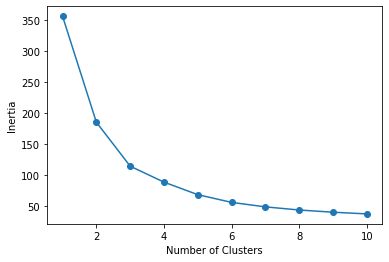

In [27]:
#Plotting inertia for different values of inertia
#calculating the distortion for a range of number of clusters 

inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
#plotting
plt.plot(np.arange(1, 11), inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

As the plot shows, the inertia decreases as the number of clusters increases. The optimal k should be where the inertia no longer decreases as rapidly.

For example, k=3 seems to be optimal, as we increase the number of clusters from 3 to 4, the decrease in inertia slows down significantly, compared to that from 2 to 3. This approach is called elbow method

# Modeling With More Features

Previously to build kmeans models, we used two (out of thirteen) features: alcohol and total phenols. The choice is random and it is easy to visualize the results. However, can we use more features, for example all of them

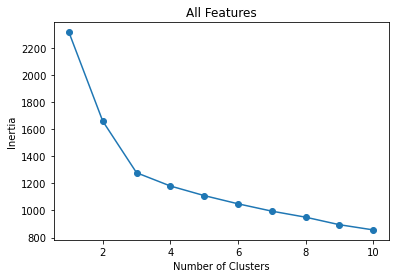

In [29]:
X1 = wine

#standardizing each feature
scale = StandardScaler()
scale.fit(X1)
X1_scaled = scale.transform(X1)

#Plotting the inertia for a range of k to determine the optimal k via elbow method
inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X1_scaled)
    inertia.append(km.inertia_)
    
plt.plot(np.arange(1, 11), inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('All Features')
plt.show()

Similarly we spot that the inertia no longer decreases as rapidly after k = 3. We then finalize the model by setting n_clusters = 3 and obtain the predictions.

In [44]:
k_opt = 3
kmeans_final = KMeans(k_opt)
kmeans_final.fit(X1_scaled)
y_pred_final = kmeans_final.predict(X1_scaled)
y_pred_final

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [45]:
collections.Counter(y_pred_final)

Counter({2: 62, 1: 65, 0: 51})

Compared to the predictions using only two features, the two models produce very similar results. For instance, the first 21 wines are predicted to belong to the same cluster from both models, so are the last 19 wines. In fact, only 13 out of 178 wines were clustered differently by the two models.

It is natural to ask, which model is better? Recall that clustering is an unsupervised learning method, which indicates that we don’t know the ground truth of the labels. Thus it is difficult, if not impossible, to determine that the model with 2 features is more accurate in grouping wines than the one with all 13 features, or vice versa.

Which model, in other words which features, should you choose is often determined by external information.

For example, the marketing department wants to know if a continent-specific strategy is needed to sell these wines. We now have access to consumers' demographic information and the three clusters identified from model A correspond better to customers in Europe, Asia, and North America respectively than model B; then model A is the winner. It is an oversimplified example.

In practice, the features are often chosen by the collaboration between data scientists and domain knowledge experts.